In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from pathlib import Path
from utils import FIG_DIR

FIG_DIR.mkdir(parents=True, exist_ok=True)

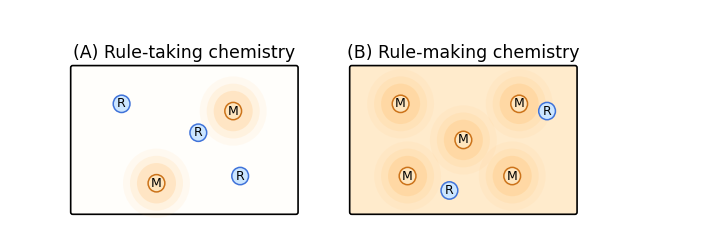

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyBboxPatch
import numpy as np

def draw_halo(ax, x, y, base_color=(1.0, 0.75, 0.45), radius=0.28):
    for i, alpha in enumerate([0.18, 0.10, 0.06]):
        c = Circle(
            (x, y),
            radius + i*0.10,
            facecolor=base_color,
            edgecolor=None,
            alpha=alpha,
            zorder=0
        )
        ax.add_patch(c)

def draw_environment(ax, xy, width, height, gradient=False):
    face = (1.0, 0.995, 0.985) if not gradient else (1.0, 0.92, 0.80)
    env = FancyBboxPatch(
        (xy[0] - width/2, xy[1] - height/2),
        width, height,
        boxstyle="round,pad=0.03",
        linewidth=1.2,
        edgecolor="black",
        facecolor=face,
        zorder=-5
    )
    ax.add_patch(env)

def draw_molecule(ax, x, y, kind):
    if kind == "R":
        face = (0.80, 0.90, 1.0)
        edge = (0.25, 0.45, 0.85)
        label = "R"
    else:
        face = (1.0, 0.90, 0.75)
        edge = (0.80, 0.45, 0.10)
        label = "M"

    c = Circle((x, y), 0.12, facecolor=face, edgecolor=edge, linewidth=1.1, zorder=10)
    ax.add_patch(c)
    ax.text(x, y, label, ha="center", va="center", fontsize=9, zorder=11)

fig, ax = plt.subplots(figsize=(9, 3))
ax.set_xlim(0, 10)
ax.set_ylim(0, 3.2)
ax.axis("off")

xA = 2.5
xB = 6.5
y_title = 2.6
y_subtitle = 2.55

ax.text(xA, y_title, "(A) Rule-taking chemistry",
        fontsize=12.5, ha="center", va="center")

ax.text(xB, y_title, "(B) Rule-making chemistry",
        fontsize=12.5, ha="center", va="center")

centerA = (xA, 1.4)
draw_environment(ax, centerA, 3.2, 2.0)

for x, y in [(xA-0.9, 1.9), (xA+0.2, 1.5), (xA+0.8, 0.9)]:
    draw_molecule(ax, x, y, "R")

for x, y in [(xA-0.4, 0.8), (xA+0.7, 1.8)]:
    draw_halo(ax, x, y, base_color=(1.0, 0.7, 0.3))
    draw_molecule(ax, x, y, "M")

centerB = (xB, 1.4)
draw_environment(ax, centerB, 3.2, 2.0, gradient=True)

M_positions = [(xB-0.9, 1.9), (xB-0.8, 0.9), (xB, 1.4),
               (xB+0.8, 1.9), (xB+0.7, 0.9)]

for x, y in M_positions:
    draw_halo(ax, x, y, base_color=(1.0, 0.7, 0.3))
    draw_molecule(ax, x, y, "M")

for x, y in [(xB-0.2, 0.7), (xB+1.2, 1.8)]:
    draw_molecule(ax, x, y, "R")

out = FIG_DIR / 'concept_cartoon.png'
plt.savefig(out, dpi=300, bbox_inches="tight")

plt.show()

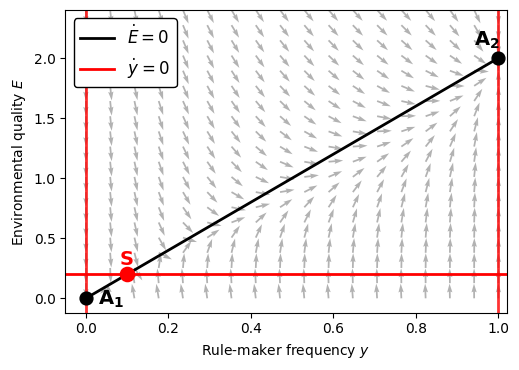

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

s = 1.0
c = 0.2
p = 1.0
alpha = 1.0
beta = 0.5

p_c = c + 1 - s 
p_eff = p * alpha / beta

E_y_null = (1 - s + c) / p

y_vals = np.linspace(0, 1, 500)
E_E_null = (alpha / beta) * y_vals

y0, E0 = 0.0, 0.0
y1, E1 = 1.0, alpha / beta

y_star = p_c / p_eff
E_star = (alpha / beta) * y_star

Y, E = np.meshgrid(
    np.linspace(0, 1, 18),
    np.linspace(0, 1.2 * E1, 20)
)

dY = Y * (1 - Y) * ((s - c + p * E) - 1)
dE = alpha * Y - beta * E

norm = np.sqrt(dY**2 + dE**2)
dY /= norm + 1e-8
dE /= norm + 1e-8

fig, ax = plt.subplots(figsize=(5.3, 3.8))

ax.quiver(
    Y, E, dY, dE,
    color='gray',
    alpha=0.6,
    scale=30,
    width=0.004
)

ax.plot(y_vals, E_E_null, color="black", lw=2, linestyle="-", label=r"$\dot E = 0$")
ax.axhline(E_y_null, color="red", lw=2, linestyle="-", label=r"$\dot y = 0$")

ax.axvline(0.0, color="red", lw=2, linestyle="-", alpha=0.8)
ax.axvline(1.0, color="red", lw=2, linestyle="-", alpha=0.8)

ax.scatter([y0, y1], [E0, E1], color="black", s=85, zorder=5)
ax.scatter(
    [y_star], [E_star],
    facecolors="red", edgecolors="red",
    s=85, lw=2.0, zorder=6
)

ax.text(y0 + 0.03, E0 -0.05, r"$\mathbf{A_1}$", fontsize=14, color="black")
ax.text(y_star - 0.02, E_star + 0.08, r"$\mathbf{S}$", fontsize=14, color="red")
ax.text(y1 - 0.06, E1 + 0.10, r"$\mathbf{A_2}$", fontsize=14, color="black")

ax.set_xlabel("Rule-maker frequency $y$")
ax.set_ylabel("Environmental quality $E$")
ax.set_xlim(-0.05, 1.02)
ax.set_ylim(-0.12, 1.2 * E1)

ax.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1, fontsize=12, loc='upper left')
plt.tight_layout()

out = FIG_DIR / '2D_nullcline.png'
plt.savefig(out, dpi=300, bbox_inches="tight")
plt.show()

p_c = 0.19999999999999996    p_eff = 0.1


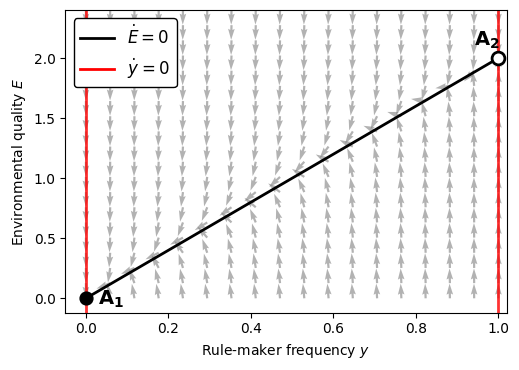

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

s = 1.0
c = 0.2
p = 0.05
alpha = 1.0
beta = 0.5

p_c = c + 1 - s 
p_eff = p * alpha / beta

print("p_c =", p_c, "   p_eff =", p_eff)

E_y_null = (1 - s + c) / p

y_vals = np.linspace(0, 1, 500)
E_E_null = (alpha / beta) * y_vals

y0, E0 = 0.0, 0.0
y1, E1 = 1.0, alpha / beta

Y, E = np.meshgrid(
    np.linspace(0, 1, 18),
    np.linspace(0, 1.2 * E1, 20)
)

dY = Y * (1 - Y) * ((s - c + p * E) - 1)
dE = alpha * Y - beta * E

norm = np.sqrt(dY**2 + dE**2)
dY /= norm + 1e-8
dE /= norm + 1e-8

fig, ax = plt.subplots(figsize=(5.3, 3.8))

ax.quiver(
    Y, E, dY, dE,
    color='gray',
    alpha=0.6,
    scale=30,
    width=0.005
)

ax.plot(y_vals, E_E_null, color="black", lw=2, linestyle="-", label=r"$\dot E = 0$")
ax.axhline(E_y_null, color="red", lw=2, linestyle="-", label=r"$\dot y = 0$")

ax.axvline(0.0, color="red", lw=2, linestyle="-", alpha=0.8)
ax.axvline(1.0, color="red", lw=2, linestyle="-", alpha=0.8)

ax.scatter([y0], [E0], color="black", s=85, zorder=5)
ax.scatter([y1], [E1], facecolors="white", edgecolors="black", s=85, lw=2, zorder=5)

ax.text(y0 + 0.03, E0 - 0.05, r"$\mathbf{A_1}$", fontsize=14, color="black")
ax.text(y1 - 0.06, E1 + 0.10, r"$\mathbf{A_2}$", fontsize=14, color="black")

ax.set_xlabel("Rule-maker frequency $y$")
ax.set_ylabel("Environmental quality $E$")
ax.set_xlim(-0.05, 1.02)
ax.set_ylim(-0.12, 1.2 * E1)

ax.legend(frameon=True, facecolor='white', edgecolor='black', framealpha=1, fontsize=12, loc='upper left')
plt.tight_layout()

# out = FIG_DIR / "2D_nullcline_monostable.png"
# plt.savefig(out, dpi=300, bbox_inches="tight")
plt.show()

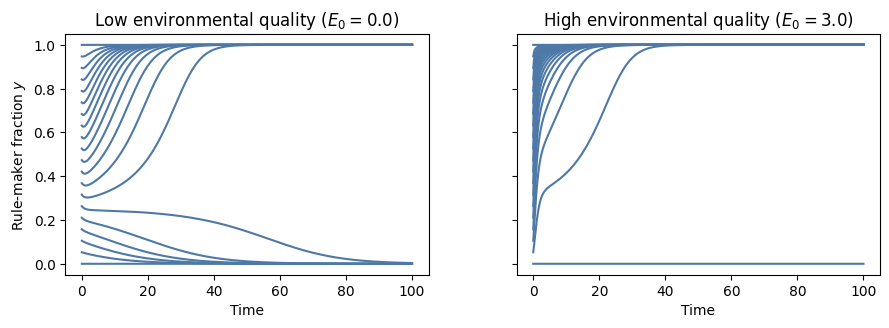

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


s = 1.0
c = 0.1
p = 0.8 
beta = 0.5
alpha = 1.0

def dydt(t, Y):
    y, E = Y
    dy = y * (1 - y) * ((s - 1 - c) + p * E)
    dE = beta * y - alpha * E
    return [dy, dE]

def integrate_extended(y0, E0, t_max=100, n_eval=1500):
    t_eval = np.linspace(0, t_max, n_eval)
    sol = solve_ivp(dydt, (0, t_max), [y0, E0], t_eval=t_eval)
    return sol.t, sol.y[0], sol.y[1]

E0_low  = 0.0
E0_high = 3.0

y0_vals = np.linspace(0, 1, 20)

fig, axes = plt.subplots(1, 2, figsize=(9, 3.6), sharey=True)

for y0 in y0_vals:
    t, y, E = integrate_extended(y0, E0_low)
    axes[0].plot(t, y, color="#4e79a7", lw=1.5)
axes[0].set_title(rf"Low environmental quality ($E_0 = {E0_low:.1f}$)")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Rule-maker fraction $y$")

for y0 in y0_vals:
    t, y, E = integrate_extended(y0, E0_high)
    axes[1].plot(t, y, lw=1.5, color="#4e79a7")

axes[1].set_title(rf"High environmental quality ($E_0 = {E0_high:.1f}$)")
axes[1].set_xlabel("Time")

fig.tight_layout(rect=[0, 0, 1, 0.94], w_pad=6.0)

out = FIG_DIR / "extended_fan.png"
fig.savefig(out, dpi=300)


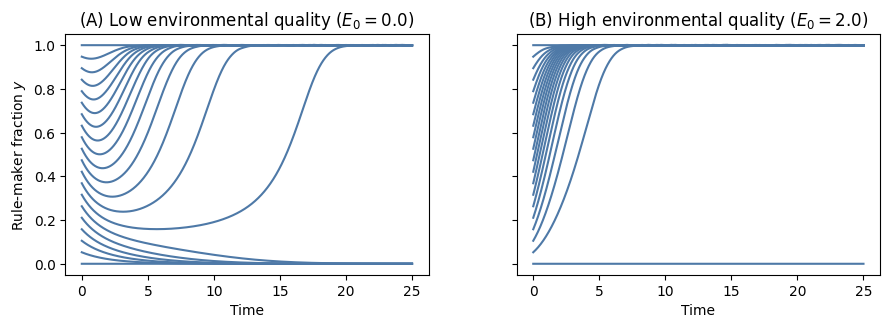

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

s = 1.0
c = 0.5
p = 0.8
beta = 0.2
alpha = 1.0

def dydt(t, Y):
    y, E = Y
    dy = y * (1 - y) * ((s - 1 - c) + p * E)
    dE = alpha * y - beta * E
    return [dy, dE]

def integrate_extended(y0, E0, t_max=25, n_eval=2000):
    t_eval = np.linspace(0, t_max, n_eval)
    sol = solve_ivp(dydt, (0, t_max), [y0, E0], t_eval=t_eval)
    return sol.t, sol.y[0], sol.y[1]

E0_low  = 0.0
E0_high = 2

y0_vals = np.linspace(0, 1, 20)

fig, axes = plt.subplots(1, 2, figsize=(9, 3.6), sharey=True)

for y0 in y0_vals:
    t, y, E = integrate_extended(y0, E0_low)
    axes[0].plot(t, y, color="#4e79a7", lw=1.5)
axes[0].set_title(rf"(A) Low environmental quality ($E_0 = {E0_low:.1f}$)")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Rule-maker fraction $y$")

for y0 in y0_vals:
    t, y, E = integrate_extended(y0, E0_high)
    axes[1].plot(t, y, lw=1.5, color="#4e79a7")

axes[1].set_title(rf"(B) High environmental quality ($E_0 = {E0_high:.1f}$)")
axes[1].set_xlabel("Time")

fig.tight_layout(rect=[0, 0, 1, 0.94], w_pad=6.0)

out = FIG_DIR / "extended_fan.png"
fig.savefig(out, dpi=300)


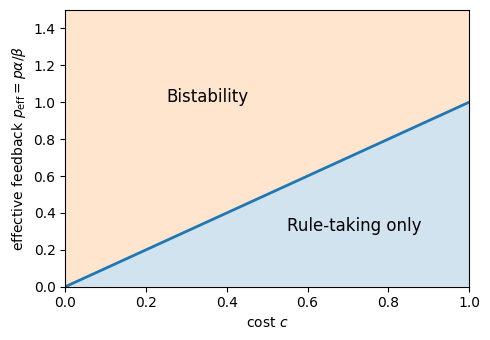

In [15]:
import numpy as np
import matplotlib.pyplot as plt

s = 1.0

c_vals = np.linspace(0.0, 1.0, 400)
p_thresh = c_vals + 1.0 - s

fig, ax = plt.subplots(figsize=(5, 3.5))

ax.plot(c_vals, p_thresh, linewidth=2)
ax.fill_between(c_vals, 0, p_thresh, alpha=0.2)
ax.fill_between(c_vals, p_thresh, 2.0, alpha=0.2)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1.5)

ax.set_xlabel(r"cost $c$")
ax.set_ylabel(r"effective feedback $p_{\mathrm{eff}} = p\alpha/\beta$")

ax.text(0.55, 0.3, "Rule-taking only", fontsize=12)
ax.text(0.25, 1., "Bistability", fontsize=12)

plt.tight_layout()
out = FIG_DIR / 'regimes.png'
plt.savefig(out, dpi=300)
plt.show()


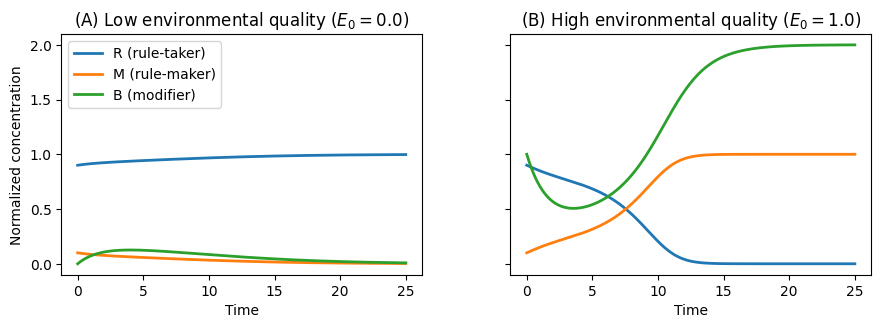

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from pathlib import Path

s     = 1.0
c     = 0.2
p     = 0.8
alpha = 1.0
beta  = 0.5

delta0 = s - c - 1.0

def feedback_odes(t, Y):
    y, E = Y
    dy = y * (1 - y) * (delta0 + p * E)
    dE = alpha * y - beta * E
    return [dy, dE]

def integrate_feedback(y0, E0, t_max=25, n_eval=1200):
    t_eval = np.linspace(0, t_max, n_eval)
    sol = solve_ivp(
        feedback_odes,
        (0.0, t_max),
        [y0, E0],
        t_eval=t_eval,
        rtol=1e-8,
        atol=1e-10,
    )
    return sol.t, sol.y[0], sol.y[1]

y0       = 0.1   # initially rare rule-makers
E0_low   = 0.0   # poor environment
E0_high  = 1.0   # favorable, pre-conditioned environment

t1, y1, E1 = integrate_feedback(y0, E0_low)
t2, y2, E2 = integrate_feedback(y0, E0_high)

R1, M1, B1 = 1.0 - y1, y1, E1
R2, M2, B2 = 1.0 - y2, y2, E2

fig, axes = plt.subplots(1, 2, figsize=(9, 3.6), sharey=True)

ax = axes[0]
ax.plot(t1, R1, lw=2, label="R (rule-taker)")
ax.plot(t1, M1, lw=2, label="M (rule-maker)")
ax.plot(t1, B1, lw=2, label="B (modifier)")
ax.set_title(rf"(A) Low environmental quality ($E_0 = {E0_low:.1f}$)")
ax.set_xlabel("Time")
ax.set_ylabel("Normalized concentration")
ax.legend(frameon=True, loc='upper left', fontsize=10)

ax = axes[1]
ax.plot(t2, R2, lw=2, label="R (rule-taker)")
ax.plot(t2, M2, lw=2, label="M (rule-maker)")
ax.plot(t2, B2, lw=2, label="B (modifier)")
ax.set_title(rf"(B) High environmental quality ($E_0 = {E0_high:.1f}$)")
ax.set_xlabel("Time")

fig.tight_layout(rect=[0, 0, 1, 0.94], w_pad=6.0)

out = FIG_DIR / "chemical_feedback_two_panel.png"
plt.savefig(out, dpi=300)
plt.show()

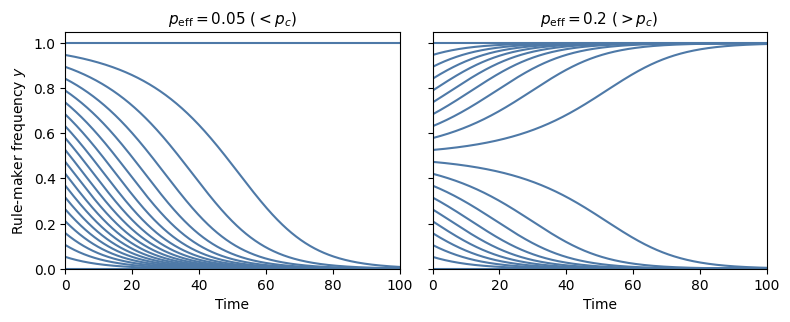

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

s = 1.0
c = 0.1
pc = 0.1
p_low = 0.05
p_high = 0.20

t_max = 100
n_eval = 800
t_eval = np.linspace(0, t_max, n_eval)

def dydt(t, y, p):
    return y * (1 - y) * ((s - 1) - c + p * y)

def integrate(y0, p):
    sol = solve_ivp(lambda t, y: dydt(t, y, p),
                    (0, t_max), [y0], t_eval=t_eval,
                    rtol=1e-9, atol=1e-9)
    return sol.t, sol.y[0]

y0_vals = np.linspace(0, 1, 20)

fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)

for y0 in y0_vals:
    t, y = integrate(y0, p_low)
    axes[0].plot(t, y, lw=1.5, color="#4e79a7")

axes[0].set_title(rf"$p_{{\mathrm{{eff}}}}={p_low}$ ($< p_c$)", fontsize=11)
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Rule-maker frequency $y$")
axes[0].set_xlim(0, t_max)
axes[0].set_ylim(0, 1.05)

for y0 in y0_vals:
    t, y = integrate(y0, p_high)
    axes[1].plot(t, y, lw=1.5, color="#4e79a7")

axes[1].set_title(rf"$p_{{\mathrm{{eff}}}}={p_high}$ ($> p_c$)", fontsize=11)
axes[1].set_xlabel("Time")
axes[1].set_xlim(0, t_max)

fig.tight_layout(rect=[0, 0, 1, 0.95])

out = FIG_DIR / "timeseries_fan.png"
plt.savefig(out, dpi=300)
plt.show()
